# Decision Tree Classification with Python and Scikit-Learn

Import Pacgkage Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Unduh Dataset

In [ ]:
!wget https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv

--2022-09-01 23:42:48--  https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [text/plain]
Saving to: ‘car_evaluation.csv.2’

car_evaluation.csv. 100%[===================>]  52.34K  --.-KB/s    in 0.01s   

2022-09-01 23:42:49 (4.72 MB/s) - ‘car_evaluation.csv.2’ saved [53593/53593]



# Import Dataset

In [ ]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

# EDA (Exploratory Data Analysis)

In [ ]:
# Melihat keseluruhan dari dataset

df.shape

(1728, 7)

disini kita bisa melihat bahwa baris dari dataset ini adalah 1728 dan kolomnya 7 variabel

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1637670871760' style='position: relative'><noscript><a href='#'><img alt='Car Evaluation Exploratory Data Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAonCarEvaluation&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1637670871760');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1677px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Melihat dataset dari 5 teratas

In [ ]:
# menampilkan 5 dataset yang teratas

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Mengubah nama dari kolom
dari sini kita bisa mengubah kolom tersebut yang tadinya hanya berupa angka kini bisa diubah dengan huruf untuk menjadi patokan data kategori, kolom tersebut akan memberi label dari kolom 0,1,2 hingga seterunya.

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

kita cek apakah sudah berubah atau belum

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Melihat dataset summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Melihat frekuensi isi setiap kolom pada isi variabel

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


lalu kita bisa mengexplore setiap kolom, disini kita menggunakan data class

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

# Mencari nilai yang hilang

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Mendeklarasi feature vector dan target variable

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# split data atau membagi data antara nilai x train dan x test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
# mengecek x_training dan x_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# feature engginer

In [ ]:
# mengecek data x_training
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# meng encode data variabel

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


# disini kita bisa melihat semua data variabel yang ordinal dalam kategori tipe data

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


dan sekarang memiliki data training dan test

### Data Modeling

In [100]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

# Decision tree

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 to avoid overfitting
dt.fit(X_train,y_train)

yp_train = dt.predict(X_train)
yp_test = dt.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

         acc       0.88      0.89      0.89       255
        good       0.71      0.73      0.72        49
       unacc       0.99      0.97      0.98       813
       vgood       0.74      1.00      0.85        40

    accuracy                           0.94      1157
   macro avg       0.83      0.90      0.86      1157
weighted avg       0.94      0.94      0.94      1157

Classification Report for Test Data
              precision    recall  f1-score   support

         acc       0.90      0.83      0.86       129
        good       0.67      0.70      0.68        20
       unacc       0.97      0.97      0.97       397
       vgood       0.74      1.00      0.85        25

    accuracy                           0.93       571
   macro avg       0.82      0.88      0.84       571
weighted avg       0.94      0.93    

# Logistic Regresstion

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(X_train,y_train)

yp_train = lr.predict(X_train)
yp_test = lr.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

         acc       0.46      0.40      0.43       255
        good       0.00      0.00      0.00        49
       unacc       0.80      0.91      0.85       813
       vgood       0.00      0.00      0.00        40

    accuracy                           0.73      1157
   macro avg       0.32      0.33      0.32      1157
weighted avg       0.66      0.73      0.69      1157

Classification Report for Test Data
              precision    recall  f1-score   support

         acc       0.49      0.38      0.43       129
        good       0.00      0.00      0.00        20
       unacc       0.80      0.94      0.86       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.74       571
   macro avg       0.32      0.33      0.32       571
weighted avg       0.67      0.74    

# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 7,random_state = 48) # Keeping max_depth = 7 same as DT
rf.fit(X_train,y_train)

yp_train = rf.predict(X_train)
yp_test = rf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)



--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

         acc       0.89      0.98      0.93       255
        good       0.80      0.88      0.83        49
       unacc       0.99      0.98      0.98       813
       vgood       1.00      0.60      0.75        40

    accuracy                           0.96      1157
   macro avg       0.92      0.86      0.87      1157
weighted avg       0.96      0.96      0.96      1157

Classification Report for Test Data
              precision    recall  f1-score   support

         acc       0.86      0.91      0.89       129
        good       0.64      0.80      0.71        20
       unacc       0.98      0.97      0.98       397
       vgood       1.00      0.60      0.75        25

    accuracy                           0.94       571
   macro avg       0.87      0.82      0.83       571
weighted avg       0.94      0.94    

# Periksa overfitting dan underfitting

In [119]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.9404
Test set score: 0.9335


# Visualisasi data

In [95]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

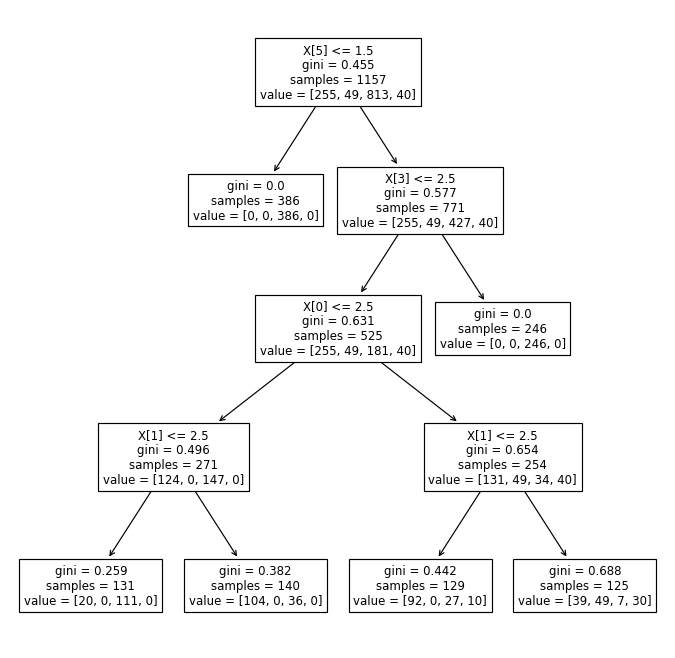

In [96]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

## Visualize decision-trees with graphviz

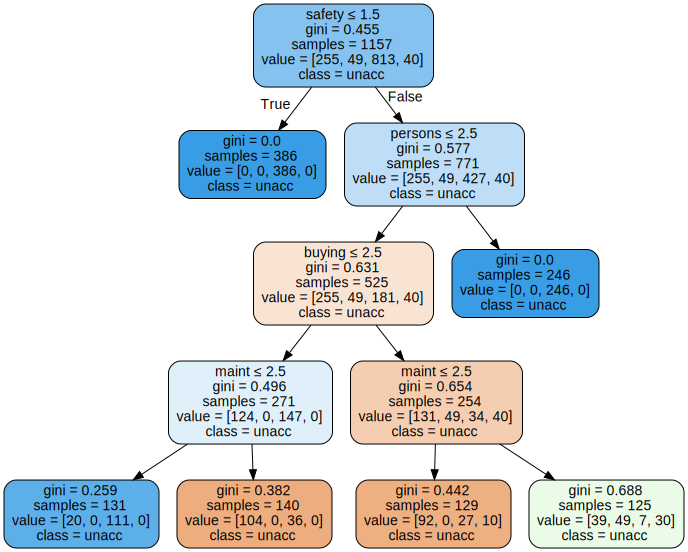

In [130]:
import graphviz 
data = tree.export_graphviz(model, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(data)
graph 